In [1]:
import importlib
import torch

from pathlib import Path
import datafawn

importlib.reload(datafawn)

<module 'datafawn' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\datafawn\\__init__.py'>

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device('cpu')
    print("CUDA not available, using CPU")

Using GPU: NVIDIA GeForce RTX 5070 Ti Laptop GPU


Dataframe with relative positions created:
Original shape: (615, 117)
New shape: (615, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


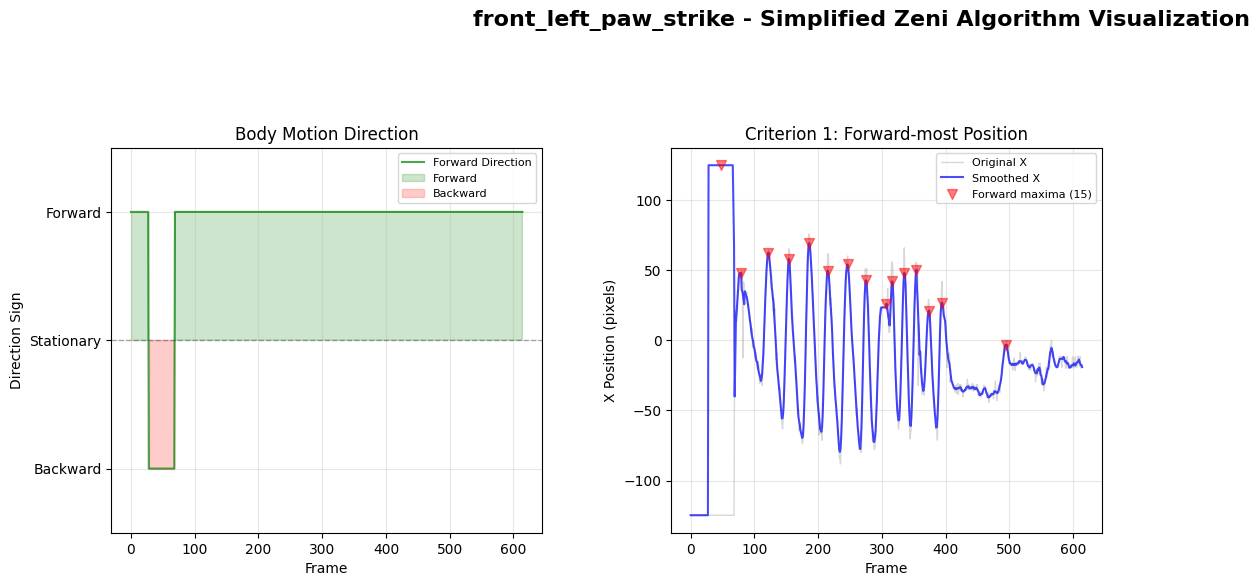

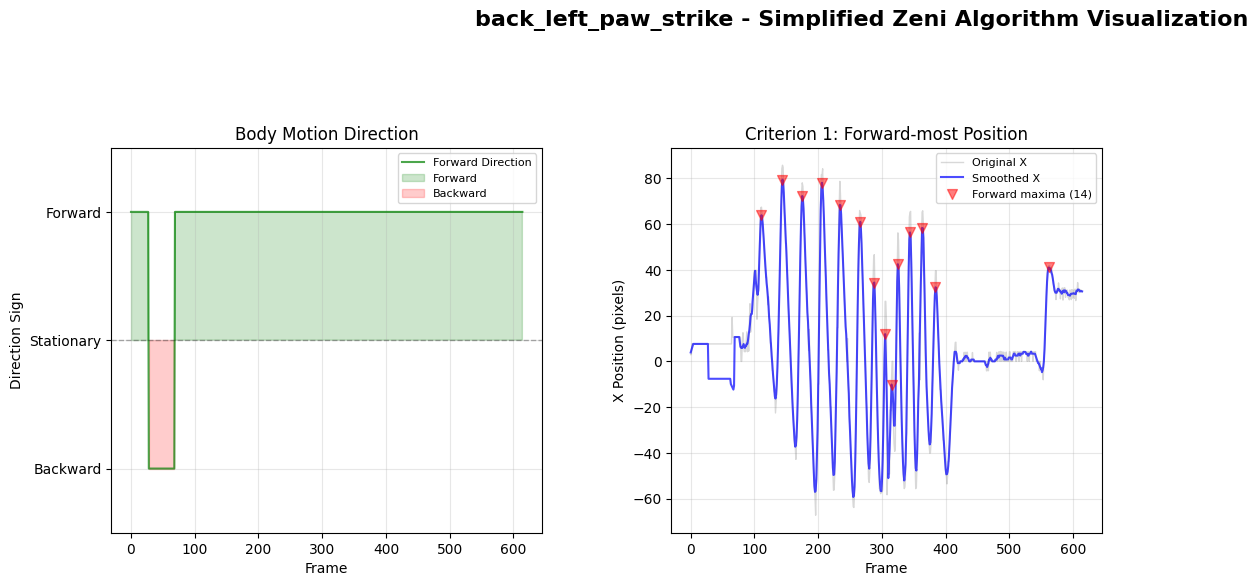

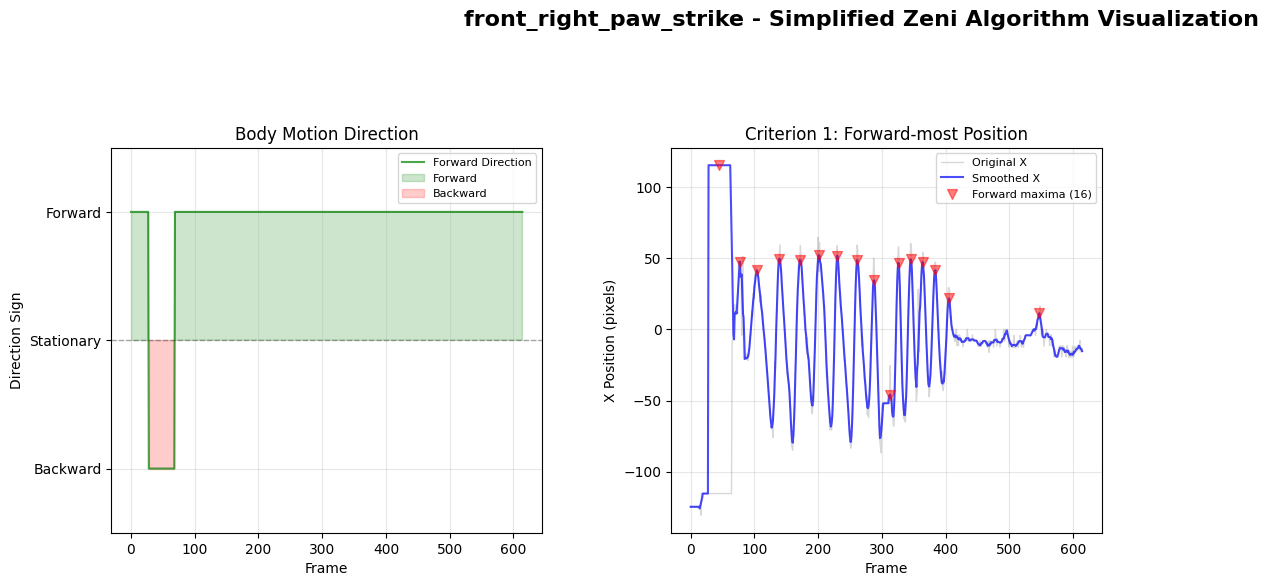

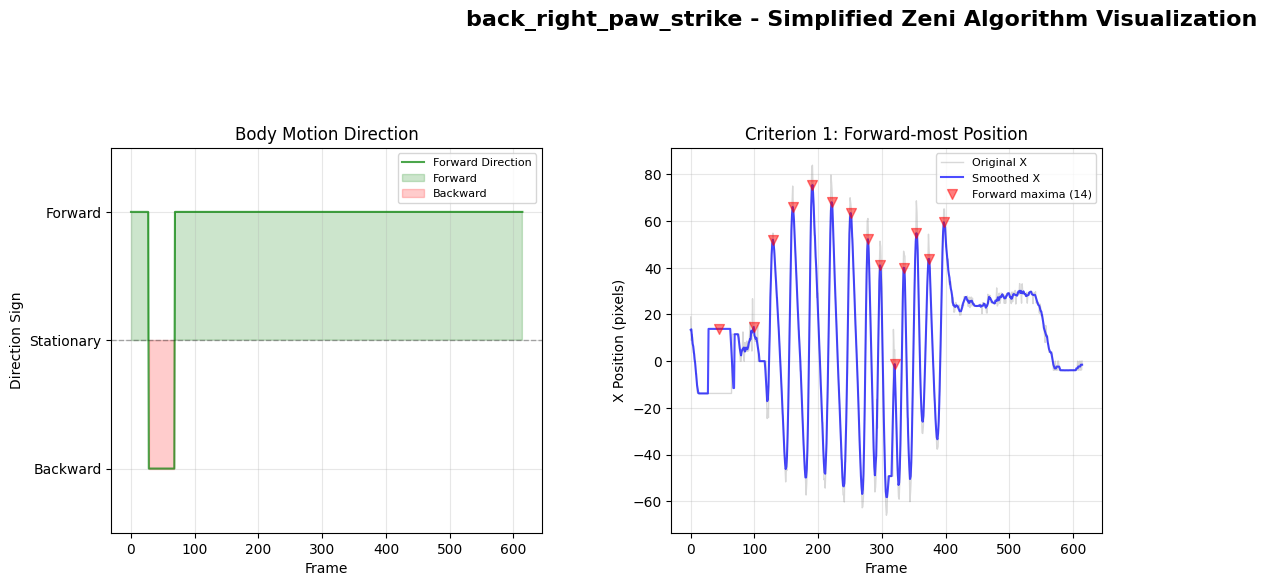

In [3]:
"""Example: Run pipeline on existing pose data."""

# Deer running
# RAW_VIDEO_PATH = 'data_example/raw_videos/deerrunning.mp4'
POSE_EST_DATA_PATH = 'data_example\\pose_estimates\\deerrunning\\deerrunning_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
# POSE_EST_VIDEO_PATH = 'data_example\\pose_estimates\\deerrunning\\deerrunning_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4'

# Deer in church (hard)
# RAW_VIDEO_PATH = 'data_example/raw_videos/churchdeer.mp4'
# POSE_EST_DATA_PATH = 'data_example\\pose_estimates\\deerrunning\\deerrunning_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
# POSE_EST_VIDEO_PATH = 'data_example\\pose_estimates\\deerrunning\\deerrunning_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4'



# =============== POSE ESTIMATORS =============== #
dlc_estimator = datafawn.DeepLabCutPoseEstimator(
    model_name='superanimal_quadruped',
    detector_name='fasterrcnn_resnet50_fpn_v2',
    hrnet_model='hrnet_w32',
    max_individuals=1,
    pcutoff=0.15,
    dest_folder='data_example/pose_estimates/deerrunning',
    # dest_folder='data_example/pose_estimates/churchdeer',
    device=device
)

# =============== POSTPROCESSORS =============== #
paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
rel_paws = ['front_left_paw_rel', 'front_right_paw_rel', 'back_left_paw_rel', 'back_right_paw_rel']

reference_map = {
    'back_base': ['front_left_paw', 'front_right_paw'],
    'tail_base': ['back_left_paw', 'back_right_paw']
}

rel_pp = datafawn.RelativePawPositionPostprocessor()

error_pp = datafawn.ErrorPostprocessor(
    bodyparts=rel_paws,
    use_velocity=True,
    use_likelihood=True,
    use_distance=True,
    velocity_kwargs={'threshold_pixels': 50, 'window_size': 5},
    likelihood_kwargs={'min_likelihood': 0.5},
    distance_kwargs={'reference_map': reference_map, 'max_distance': 300}
    )



# =============== EVENT EXTRACTORS =============== #
zeni_extractor = datafawn.ZeniExtractor(
    smooth_window_size=5,
    prominence_percentage=0.08,
    orientation_likelihood_threshold=0.0,
    orientation_smooth_window_size=15,
    show_plots=True
)

# Create pipeline
pipeline = datafawn.EventDetectionPipeline(
    pose_estimator=dlc_estimator,
    postprocessors=[rel_pp, error_pp],
    event_extractors=[zeni_extractor]
)

# Run on existing pose data
results = pipeline.run(
    # video_path=RAW_VIDEO_PATH,   # run DLC on raw video first
    pose_data_path=POSE_EST_DATA_PATH,     # use pose estimate data if you already have it
)



In [4]:
results.keys()

dict_keys(['pose_data', 'postprocessed_data', 'events', 'soundscapes', 'metadata'])

In [5]:
# Access results
print("Pose data shape:", results['pose_data'].shape)
print("Postprocessed data shape:", results['postprocessed_data'].shape)
print("Event extractors run:", results['metadata']['extractor_names'])

Pose data shape: (615, 117)
Postprocessed data shape: (615, 129)
Event extractors run: ['zeni']


In [5]:
results['events']

{('superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_',
  'animal0'): {'front_left_paw_strike': [47,
   79,
   122,
   154,
   186,
   215,
   246,
   275,
   307,
   316,
   335,
   354,
   374,
   394,
   494], 'back_left_paw_strike': [111,
   144,
   175,
   206,
   234,
   266,
   288,
   305,
   315,
   325,
   344,
   363,
   384,
   562], 'front_right_paw_strike': [45,
   77,
   104,
   139,
   171,
   201,
   230,
   261,
   288,
   313,
   326,
   345,
   364,
   384,
   405,
   547], 'back_right_paw_strike': [45,
   99,
   129,
   160,
   191,
   221,
   251,
   278,
   297,
   320,
   334,
   354,
   374,
   397]}}

# ADD SOUNDS

In [25]:
# TODO: add this to the pipeline

In [26]:
from add_sounds_to_video import add_sounds_for_all_paws

import importlib
import add_sounds_to_video

importlib.reload(add_sounds_to_video)

<module 'add_sounds_to_video' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\add_sounds_to_video.py'>

In [27]:
strikes_parsed = results['events']['zeni']['strikes'][('superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_',
  'animal0')]
# strikes_parsed

In [ ]:
# Define different sounds for each paw
paw_sound_map = {
    'front_left_paw_rel': 'data_example/sounds/22415__anthousai__wind-chimes/398494__anthousai__wind-chimes-single-01.wav',
    'front_right_paw_rel': 'data_example/sounds/22415__anthousai__wind-chimes/398493__anthousai__wind-chimes-single-02.wav',
    'back_left_paw_rel': 'data_example/sounds/22415__anthousai__wind-chimes/398492__anthousai__wind-chimes-single-03.wav',
    'back_right_paw_rel': 'data_example/sounds/22415__anthousai__wind-chimes/398496__anthousai__wind-chimes-single-04.wav'
}


# Add all sounds to video at once
output_path = add_sounds_for_all_paws(
    video_path=RAW_VIDEO_PATH, # raw video
    # video_path=POSE_EST_VIDEO_PATH, # video with pose estimation added
    strikes_dict=strikes_parsed,  
    paw_sound_map=paw_sound_map,
    # output_path = 'data_example/soundscape_vids/churchdeer.mp4',
    output_path = 'data_example/soundscape_vids/deerrunning.mp4',
    )

Loading video: data\raw_videos\examples\deerrunning.mp4
Video FPS: 29.97002997002997
Video duration: 20.52 seconds

Processing front_left_paw_rel:
  Found 15 strikes
  Strike timestamps: ['1.57s', '2.64s', '4.07s']...
  Sound duration: 5.00 seconds
  Created 15 audio clips for front_left_paw_rel

Processing front_right_paw_rel:
  Found 16 strikes
  Strike timestamps: ['1.50s', '2.57s', '3.47s']...
  Sound duration: 3.16 seconds
  Created 16 audio clips for front_right_paw_rel

Processing back_left_paw_rel:
  Found 14 strikes
  Strike timestamps: ['3.70s', '4.80s', '5.84s']...
  Sound duration: 3.19 seconds
  Created 14 audio clips for back_left_paw_rel

Processing back_right_paw_rel:
  Found 14 strikes
  Strike timestamps: ['1.50s', '3.30s', '4.30s']...
  Sound duration: 4.04 seconds
  Created 14 audio clips for back_right_paw_rel

Total audio clips created: 59

Writing output video to: data\soundscape_vids\examples\deerrunning.mp4
MoviePy - Building video data\soundscape_vids\examples

MoviePy - Done.
MoviePy - Writing video data\soundscape_vids\examples\deerrunning.mp4



MoviePy - Done !
MoviePy - video ready data\soundscape_vids\examples\deerrunning.mp4
Done! Output saved to: data\soundscape_vids\examples\deerrunning.mp4
